## Step 1 Merging Files 

In [1]:
import pandas as pd
import os

In [2]:
directory = 'datasets'

In [3]:
dataframes = []
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dataframes.append(df)

In [4]:
combined_df = pd.concat(dataframes, ignore_index=True)

In [9]:
print(combined_df.head())  

   Number                                              title  \
0       1                                          No Scrubs   
1       2                                 I Want It That Way   
2       3                                       It Wasn't Me   
3       4  Because You Loved Me (Theme from "Up Close and...   
4       5                          Big Poppa - 2005 Remaster   

                 artist           top genre  year  bpm  nrgy  dnce  dB  live  \
0                   TLC         atl hip hop  1999   93    68    74  -4     7   
1       Backstreet Boys            boy band  2001   99    70    69  -6    16   
2                Shaggy           dance pop  2000   95    61    85  -5    31   
3          CÃ©line Dion        canadian pop  1996  120    47    61 -10    10   
4  The Notorious B.I.G.  east coast hip hop  1994   84    58    78  -7    14   

   val  dur  acous  spch  pop  
0   59  214      3    10   79  
1   48  214     22     3   76  
2   65  228      6     7   76  
3   18

In [6]:
print(combined_df.shape)  

(667, 15)


In [10]:
combined_df.to_csv('new_data.csv', index=False)

## Step 2 Cleaning the data 

In [11]:
data = pd.read_csv('new_data.csv')

In [12]:
data.columns

Index(['Number', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
       'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [13]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [15]:
missing_values = data.isnull().sum()

In [16]:
missing_values

number        0
title         0
artist        0
top_genre    16
year          0
bpm           0
nrgy          0
dnce          0
db            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [17]:
duplicate_records = data.duplicated().sum()
duplicate_records

0

In [18]:
# Impute missing 'top_genre' values with the most common genre
most_common_genre = data['top_genre'].mode()[0]
data['top_genre'].fillna(most_common_genre, inplace=True)

In [19]:
# Verifying
data['top_genre'].isnull().sum()

0

In [20]:
data_types = data.dtypes
descriptive_stats = data.describe()

In [21]:
data_types, descriptive_stats

(number        int64
 title        object
 artist       object
 top_genre    object
 year          int64
 bpm           int64
 nrgy          int64
 dnce          int64
 db            int64
 live          int64
 val           int64
 dur           int64
 acous         int64
 spch          int64
 pop           int64
 dtype: object,
            number         year         bpm        nrgy        dnce  \
 count  667.000000   667.000000  667.000000  667.000000  667.000000   
 mean    48.718141  1994.967016  119.121439   61.394303   60.325337   
 std     28.414748    17.771374   25.030827   21.703963   15.051583   
 min      1.000000  1945.000000   62.000000    6.000000   18.000000   
 25%     24.000000  1980.000000  101.500000   45.000000   51.000000   
 50%     48.000000  1998.000000  120.000000   64.000000   62.000000   
 75%     72.000000  2010.000000  134.000000   79.000000   71.000000   
 max    105.000000  2019.000000  199.000000  100.000000   96.000000   
 
                db        li

In [22]:
#year:  1945 to 2019

## Step 3 EDA

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

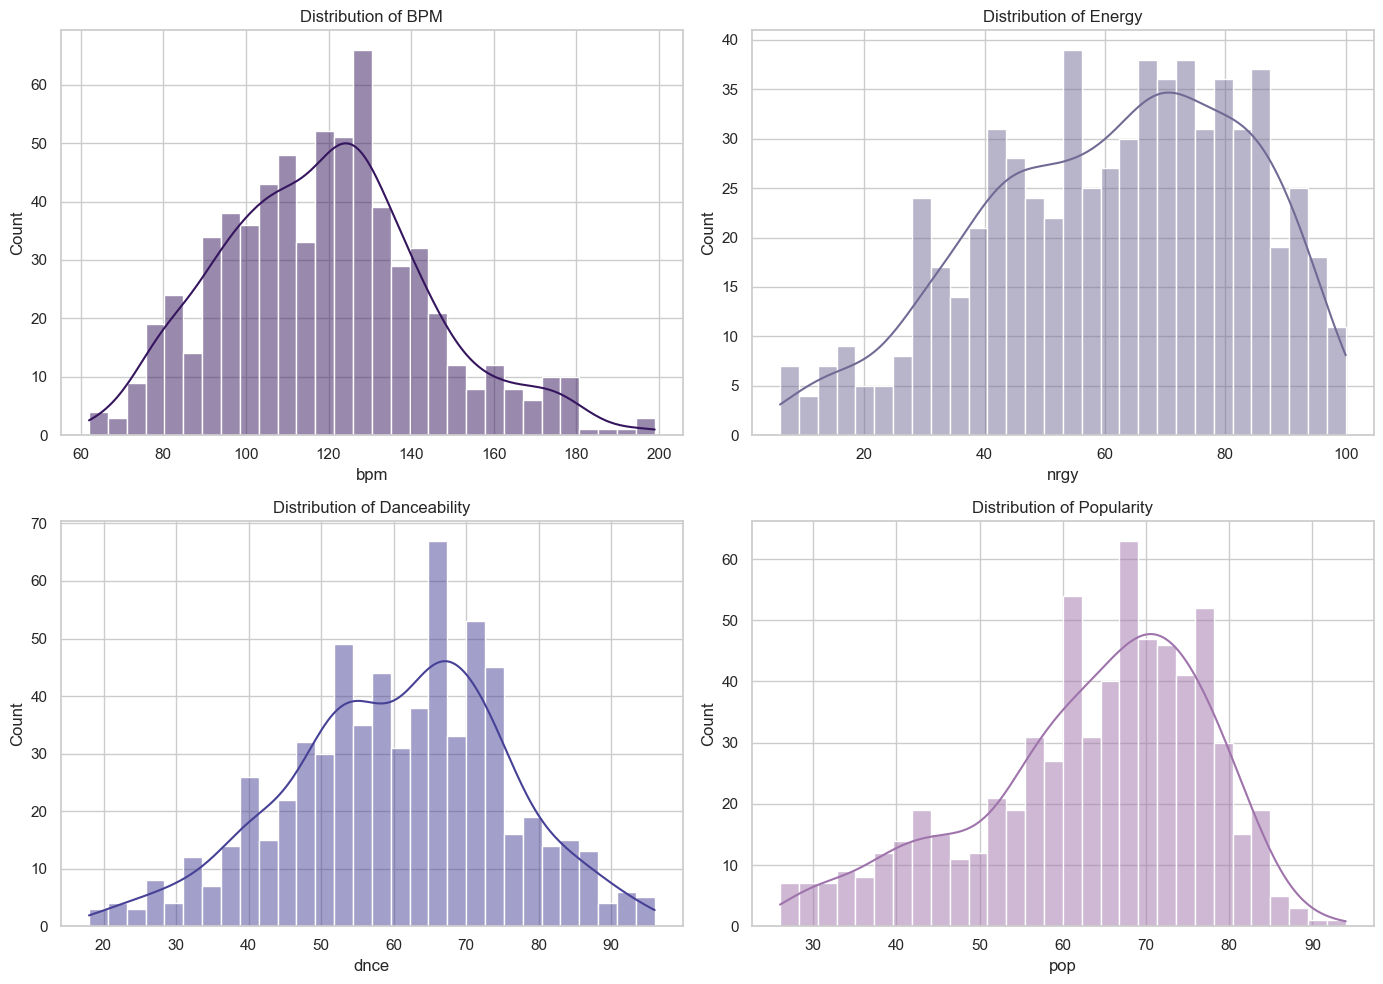

In [53]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograms for 'bpm', 'nrgy', 'dnce', and 'pop'
sns.histplot(data['bpm'], bins=30, ax=axes[0, 0], color='#35155D', kde=True)
axes[0, 0].set_title('Distribution of BPM')

sns.histplot(data['nrgy'], bins=30, ax=axes[0, 1], color='#726A95', kde=True)
axes[0, 1].set_title('Distribution of Energy')

sns.histplot(data['dnce'], bins=30, ax=axes[1, 0], color='#464196', kde=True)
axes[1, 0].set_title('Distribution of Danceability')

sns.histplot(data['pop'], bins=30, ax=axes[1, 1], color='#9F73AB', kde=True)
axes[1, 1].set_title('Distribution of Popularity')

plt.tight_layout()
plt.show()


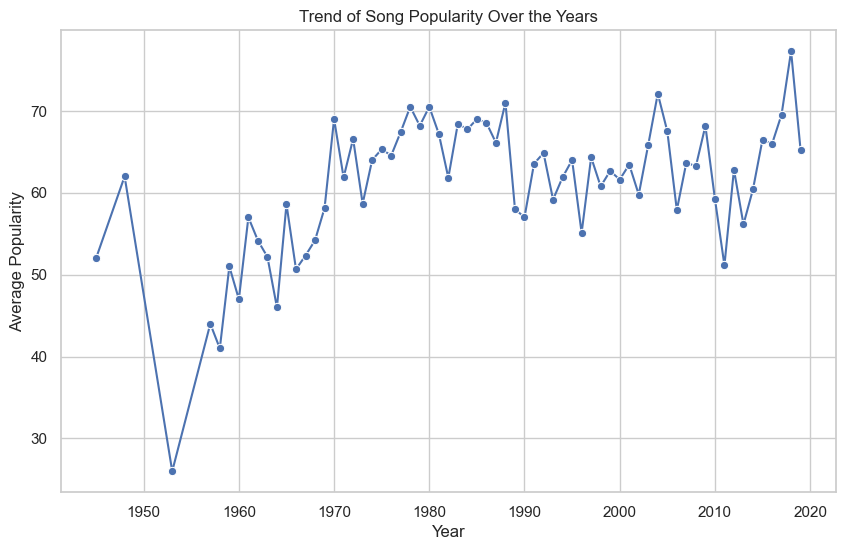

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='pop', data=data, estimator='mean', errorbar=None, marker='o')
plt.title('Trend of Song Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_30332/1973750826.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


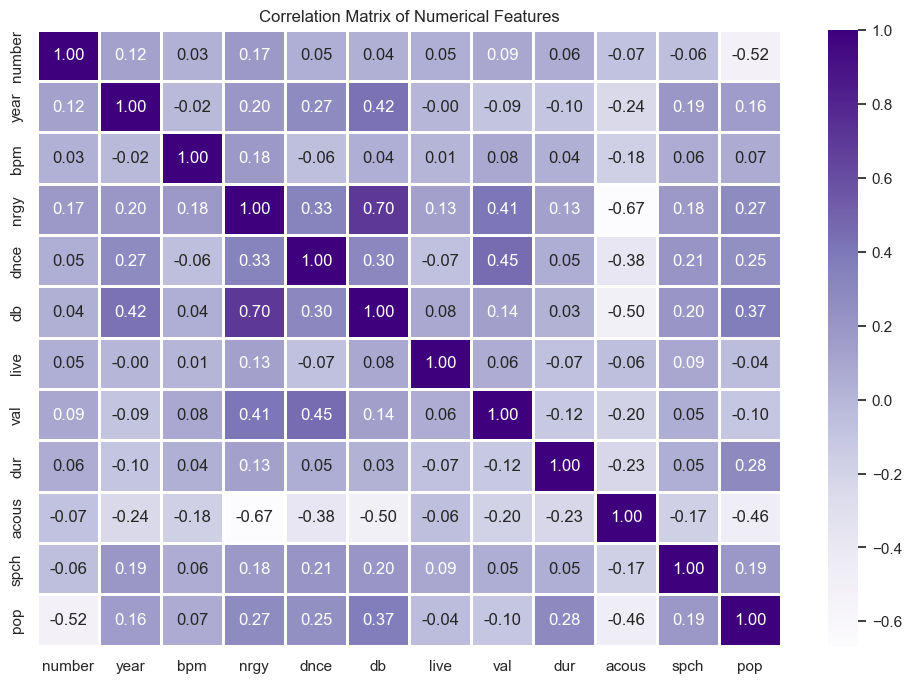

In [31]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='Purples', fmt=".2f", linewidths=2)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

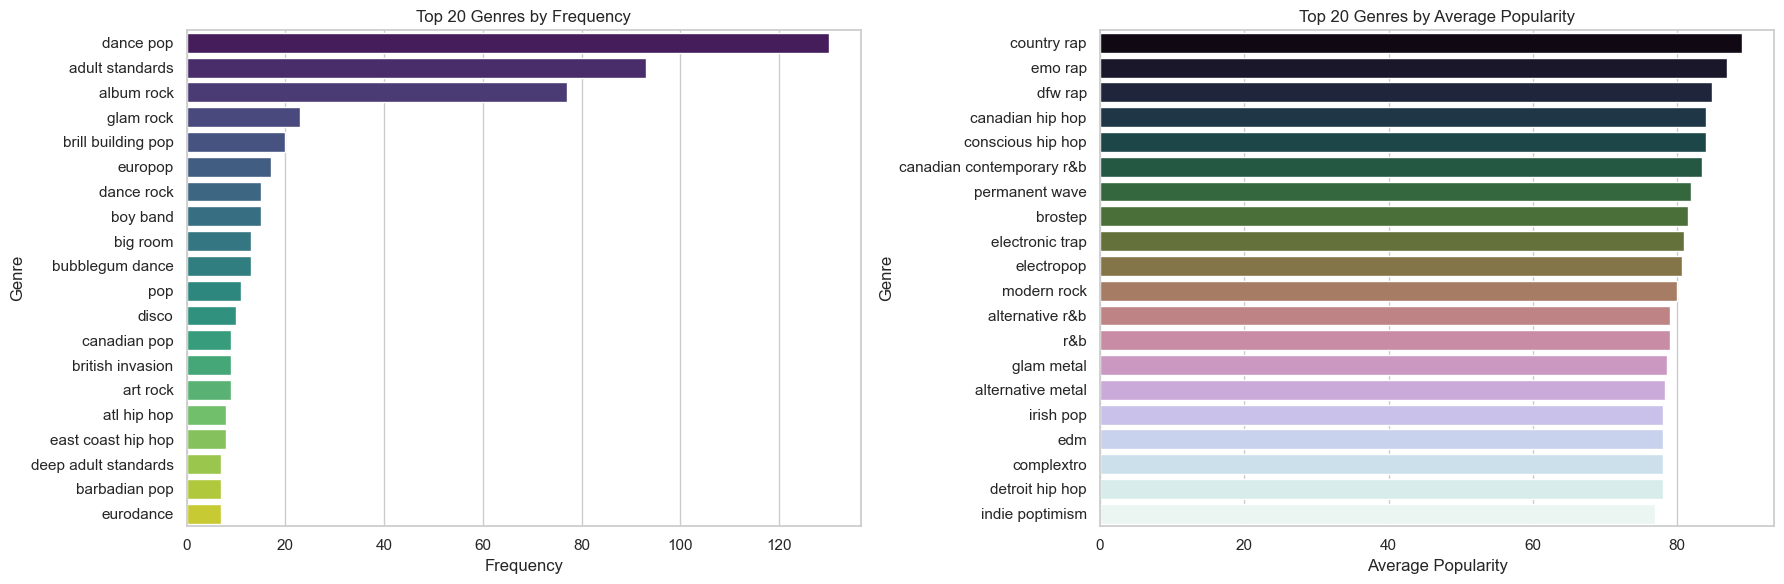

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Genre distribution
genre_counts = data['top_genre'].value_counts().head(20)  # Top 20 genres for better visibility
sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 20 Genres by Frequency')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Genre')

# Average popularity by genre
avg_pop_by_genre = data.groupby('top_genre')['pop'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=avg_pop_by_genre.values, y=avg_pop_by_genre.index, ax=axes[1], palette='cubehelix')
axes[1].set_title('Top 20 Genres by Average Popularity')
axes[1].set_xlabel('Average Popularity')
axes[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

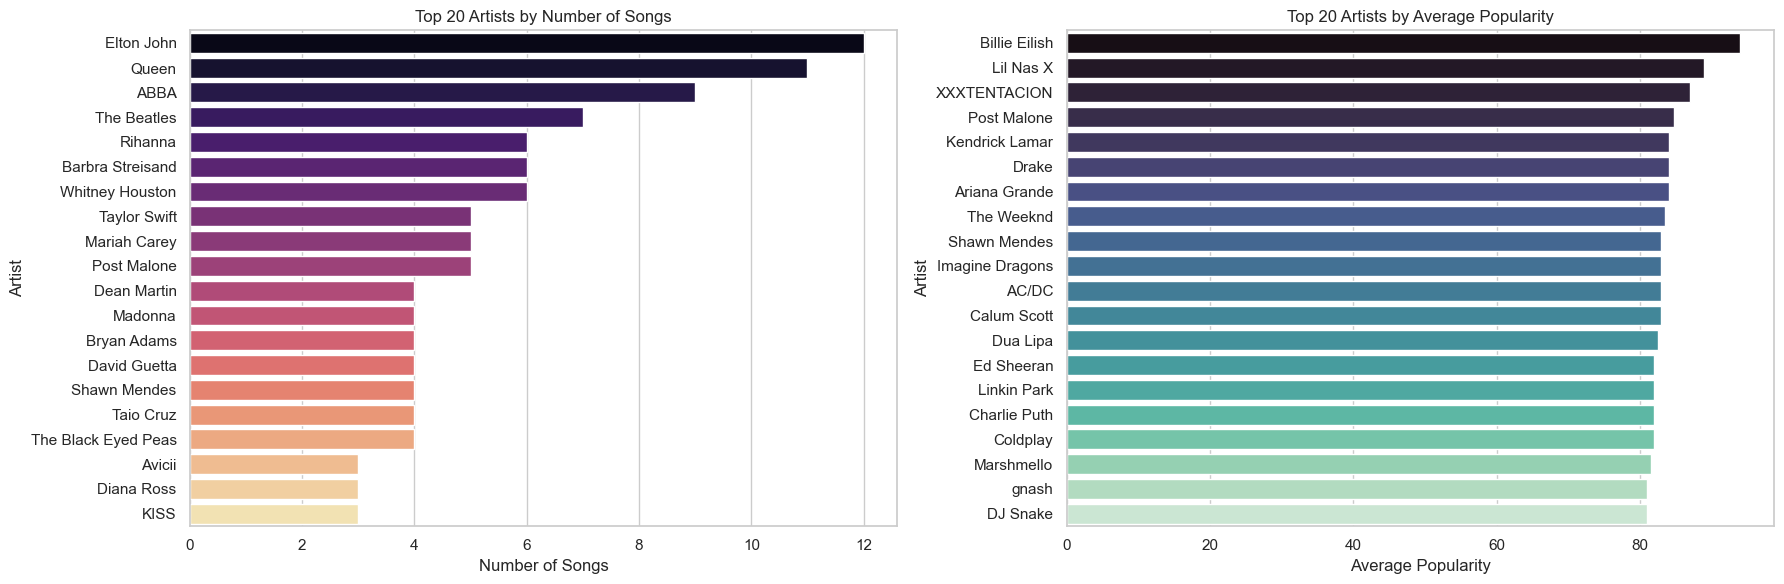

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top artists by number of songs
top_artists = data['artist'].value_counts().head(20)  # Top 20 artists for better visibility
sns.barplot(x=top_artists.values, y=top_artists.index, ax=axes[0], palette='magma')
axes[0].set_title('Top 20 Artists by Number of Songs')
axes[0].set_xlabel('Number of Songs')
axes[0].set_ylabel('Artist')

# Average popularity by artist
avg_pop_by_artist = data.groupby('artist')['pop'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=avg_pop_by_artist.values, y=avg_pop_by_artist.index, ax=axes[1], palette='mako')
axes[1].set_title('Top 20 Artists by Average Popularity')
axes[1].set_xlabel('Average Popularity')
axes[1].set_ylabel('Artist')

plt.tight_layout()
plt.show()
